In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc
mc = simr.ms.mc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
mc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
MC: Hi!  You're in masked_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


In [2]:
tDir = '../targetDir1'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'r00000' Good!


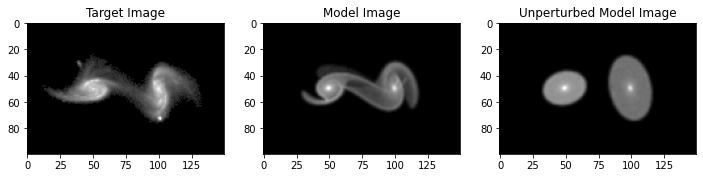

In [3]:
tParams = tInfo.getImageParams()
#gm.pprint(tParams)

tImg = tInfo.getTargetImage('zoo_2')
mImg = rInfo.getModelImage('zoo_2')
iImg = rInfo.getModelImage('zoo_2',initImg=True)

fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].set_title("Target Image")
ax[0].imshow( tImg, cmap='gray' )

ax[1].set_title("Model Image")
ax[1].imshow(mImg,cmap='gray')

ax[2].set_title("Unperturbed Model Image")
ax[2].imshow(iImg,cmap='gray')

In [4]:

def plotMasks( tImg, mImg, iImg, otImg, omImg, oiImg, mtImg, mmImg, miImg ):
    
    fig, ax = plt.subplots(3,3,figsize=(16,12))
    ax[0,0].set_title("Target Image")
    ax[0,0].imshow( tImg, cmap='gray' )
    ax[0,1].set_title("Model Image")
    ax[0,1].imshow( mImg, cmap='gray')
    ax[0,2].set_title("Unperturbed Model Image")
    ax[0,2].imshow( iImg, cmap='gray')
    
    ax[1,0].set_title("Mask Overlap Target Image")
    ax[1,0].imshow( otImg, cmap='gray' )
    ax[1,1].set_title("Mask Overlap Model Image")
    ax[1,1].imshow( omImg, cmap='gray')
    ax[1,2].set_title("Mask Overlap Unperturbed Model Image")
    ax[1,2].imshow( oiImg, cmap='gray')
    
    ax[2,0].set_title("Masked Target Image")
    ax[2,0].imshow( mtImg, cmap='gray', vmin=0, vmax=1.0 )
    ax[2,1].set_title("Masked Model Image")
    ax[2,1].imshow( mmImg, cmap='gray', vmin=0, vmax=1.0)
    ax[2,2].set_title("Masked Unperturbed Model Image")
    ax[2,2].imshow( miImg, cmap='gray', vmin=0, vmax=1.0)

Should Match
(627,)
(627,)
(627,)


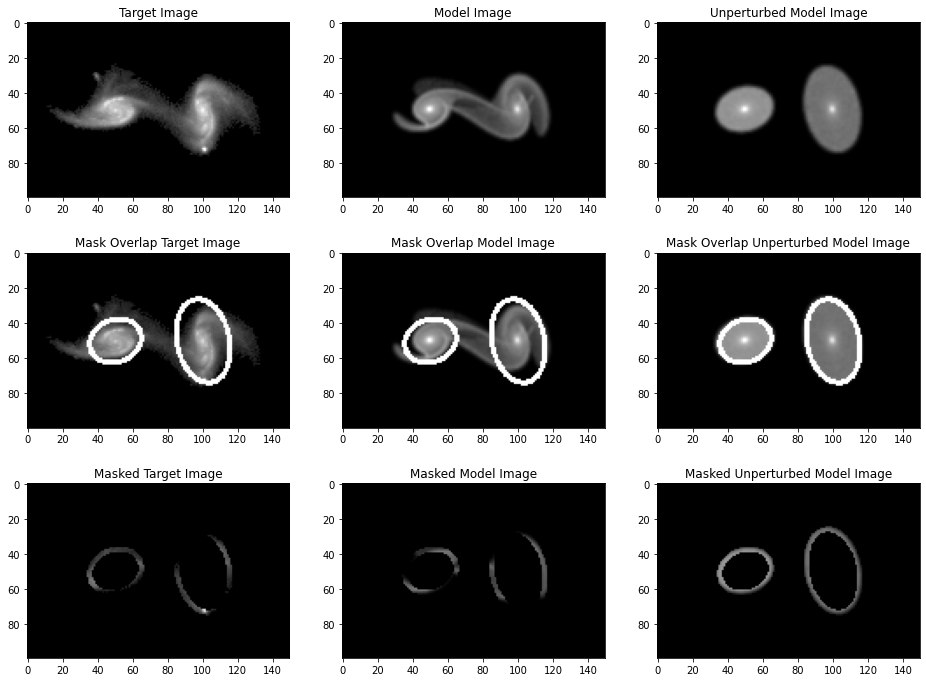

In [5]:
px = tParams['zoo_2']['imgArg']['galaxy_centers']['px']
py = tParams['zoo_2']['imgArg']['galaxy_centers']['py']
sx = tParams['zoo_2']['imgArg']['galaxy_centers']['sx']
sy = tParams['zoo_2']['imgArg']['galaxy_centers']['sy']

centers = [ (px,py), (sx,sy) ]
color = ( 1.0, 1.0, 1.0 )
thickness = [ 2, 2 ]
axesLength = [ (15, 12), (24,15) ]
angles = [ -20, -102 ]

mask = np.zeros_like(tImg)
for i in range(2):
    mask = mc.createEllipse( mask, centers[i], color=color, thickness=thickness[i], angle = angles[i], axesLength = axesLength[i] )

#plt.imshow(mask)

otImg = mc.addBinaryMask( tImg, mask )
omImg = mc.addBinaryMask( mImg, mask )
oiImg = mc.addBinaryMask( iImg, mask )

mtImg = mc.applyBinaryMask( tImg, mask )
mmImg = mc.applyBinaryMask( mImg, mask )
miImg = mc.applyBinaryMask( iImg, mask )

#mmImg = matchBrightness( mmImg, mtImg )  # Have average brightnessess match
#miImg = matchBrightness( miImg, mtImg )  # Have average brightnessess match

plotMasks( tImg, mImg, iImg, otImg, omImg, oiImg, mtImg, mmImg, miImg )

etImg = mc.extractBinaryMask( tImg, mask )
emImg = mc.extractBinaryMask( mImg, mask )
eiImg = mc.extractBinaryMask( iImg, mask )

print("Should Match")
print(etImg.shape)
print(emImg.shape)
print(eiImg.shape)


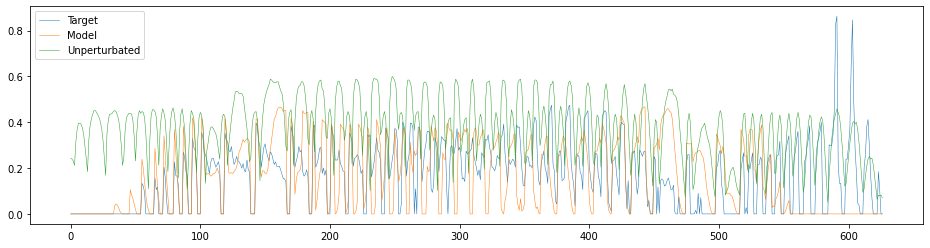

In [6]:
plt.figure(figsize=(16,4))
plt.plot(etImg,label='Target',linewidth=.5)
plt.plot(emImg,label='Model',linewidth=.5)
plt.plot(eiImg,label='Unperturbated',linewidth=.5)
plt.legend()

In [9]:
cmpArg = tParams['zoo_2']['cmpArg']

cmpList = dc.scoreFunctions

etImg = mc.extractBinaryMask( tImg, mask )
emImg = mc.extractBinaryMask( mImg, mask )
emImg2= dc.matchAvgBrightness( emImg, etImg )
eiImg = mc.extractBinaryMask( iImg, mask )
eiImg2= dc.matchAvgBrightness( eiImg, etImg )

for name, func in cmpList:
    print( '%35s : %.4f - %.4f - %.4f - %.4f' % ( name, func(etImg, emImg, cmpArg), func(etImg, eiImg, cmpArg), func(etImg, emImg2, cmpArg), func(etImg, eiImg2, cmpArg), ) )

mc.test()
print('Target to Model: ', mc.mask_binary_simple_compare( tImg, mImg, mask, cmpArg) )
print('Target to Unperturbed', mc.mask_binary_simple_compare( tImg, iImg, mask, cmpArg) )


          score_absolute_difference : 0.8819 - 0.7728 - 0.8792 - 0.8891
  score_absolute_difference_squared : 0.9712 - 0.9314 - 0.9704 - 0.9813
           score_binary_correlation : 0.1504 - 0.1682 - 0.1504 - 0.2735
                  score_correlation : 0.3767 - 0.3480 - 0.3767 - 0.3480
             score_overlap_fraction : 0.2857 - 0.3398 - 0.2857 - 0.2172
                         score_ssim : 0.4199 - 0.2442 - 0.4151 - 0.3324
                 score_test_compare : -1.0000 - -1.0000 - -1.0000 - -1.0000
MC: Hi!  You're in masked_image_compare.py
Target to Model:  0.37667814127074506
Target to Unperturbed 0.34795505402747434


In [10]:

mask_params = {}
mask_name = 'mask_binary_0'
mask_params[mask_name] = deepcopy( tParams['zoo_2'] )
mask_params[mask_name]['cmpArg']['type'] = 'mask_binary_simple_compare'
mask_params[mask_name]['cmpArg']['mask'] = {}
mask_params[mask_name]['cmpArg']['mask']['name'] = mask_name
mask_params[mask_name]['cmpArg']['mask']['type'] = 'target'
mask_params[mask_name]['cmpArg']['brightness_match'] = 'match_average'

gm.pprint(mask_params)


newScoreArgs = gm.inArgClass()
newScoreArgs.setArg( 'scoreParams', mask_params )
newScoreArgs.setArg( 'printAll', True )
newScoreArgs.setArg( 'newImage', True )
newScoreArgs.setArg( 'newScore', True )

simr.simr_run( rInfo=rInfo, arg = newScoreArgs)


SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd5dcb03130>
IC: image_creator_run
IM: run_info_class.__init__
	 - runDir:  None
IM: WARNING: run_info_class.__init__: Invalid run dir
	 - runDir: - None
IC: rInfo.status:  False
IC: WARNGING:
	 - rInfo status not good. Exiting...
MS: Run:
MS: scoreName: mask_binary_0
MS: mask_compare_setup: zoo_2
	 -  paramName: zoo_2
	 -  modelName: zoo_2
	 - targetName: zoo_2
	 -   maskName: mask_binary_0
	 - Read target image
	 - Read model image
	 - Read target mask
MS: New Score!: zoo_2 - 0.846133 - 0.846133


In [11]:
mask_params = {}
mask_name = 'mask_binary_blank'
mask_params[mask_name] = deepcopy( tParams['zoo_2'] )
mask_params[mask_name]['cmpArg']['type'] = 'mask_binary_simple_compare'
mask_params[mask_name]['cmpArg']['mask'] = {}
mask_params[mask_name]['cmpArg']['mask']['name'] = 'blank'
mask_params[mask_name]['cmpArg']['mask']['type'] = 'target'
mask_params[mask_name]['cmpArg']['brightness_match'] = 'match_average'

gm.pprint(mask_params)
i = 1
for name, func in 

[('score_absolute_difference', <function score_absolute_difference at 0x7fd5862221f0>), ('score_absolute_difference_squared', <function score_absolute_difference_squared at 0x7fd58620f1f0>), ('score_binary_correlation', <function score_binary_correlation at 0x7fd58620f4c0>), ('score_correlation', <function score_correlation at 0x7fd58620f3a0>), ('score_overlap_fraction', <function score_overlap_fraction at 0x7fd58620f310>), ('score_ssim', <function score_ssim at 0x7fd58620f280>), ('score_test_compare', <function score_test_compare at 0x7fd593b56700>)]
